# HDMA Washington State Data

About the data: The Home Mortgage Disclosure Act (HMDA) requires many financial institutions to maintain, report, and publicly disclose information about mortgages. These public data are important because they help show whether lenders are serving the housing needs of their communities; they give public officials information that helps them make decisions and policies; and they shed light on lending patterns that could be discriminatory.

Kaggle source: https://www.kaggle.com/miker400/washington-state-home-mortgage-hdma2016

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import pytz
import os
import scipy.stats as stat
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv("Washington_State_HDMA-2016.csv.zip", low_memory=False)

In [4]:
data.head()

,tract_to_msamd_income,rate_spread,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,...,applicant_sex_name,applicant_race_name_5,applicant_race_name_4,applicant_race_name_3,applicant_race_name_2,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
0,121.690002,NaN,8381.0,23.790001,2175.0,2660.0,227,73300.0,116.0,Washington,...,Female,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
1,83.370003,NaN,4915.0,23.990000,1268.0,1777.0,240,57900.0,42.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
2,91.129997,NaN,5075.0,11.820000,1136.0,1838.0,241,73300.0,117.0,Washington,...,Male,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
3,146.169998,NaN,5032.0,8.590000,1525.0,1820.0,351,73300.0,315.0,Washington,...,Male,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",National Credit Union Administration,NCUA,Loan originated
4,162.470001,NaN,5183.0,10.500000,1705.0,2104.0,417,78100.0,114.0,Washington,...,Female,NaN,NaN,NaN,NaN,White,Not Hispanic or Latino,Federal Deposit Insurance Corporation,FDIC,Loan originated


In [5]:
data.shape

(466566, 47)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466566 entries, 0 to 466565
Data columns (total 47 columns):
tract_to_msamd_income             465951 non-null float64
rate_spread                       8638 non-null float64
population                        465956 non-null float64
minority_population               465956 non-null float64
number_of_owner_occupied_units    465944 non-null float64
number_of_1_to_4_family_units     465955 non-null float64
loan_amount_000s                  466566 non-null int64
hud_median_family_income          465960 non-null float64
applicant_income_000s             404533 non-null float64
state_name                        466566 non-null object
state_abbr                        466566 non-null object
sequence_number                   466566 non-null int64
respondent_id                     466566 non-null object
purchaser_type_name               466566 non-null object
property_type_name                466566 non-null object
preapproval_name              

In [7]:
data.action_taken_name.unique()

array(['Loan originated', 'Application approved but not accepted',
       'Application denied by financial institution',
       'Application withdrawn by applicant',
       'File closed for incompleteness',
       'Loan purchased by the institution',
       'Preapproval request denied by financial institution',
       'Preapproval request approved but not accepted'], dtype=object)

In [363]:
len(data)

466566

In [364]:
df = data.loc[(data.action_taken_name.str.contains('Loan originated'))
              | (data.action_taken_name.str.contains('Application denied by financial institution')) ]

## Visualizing missing data

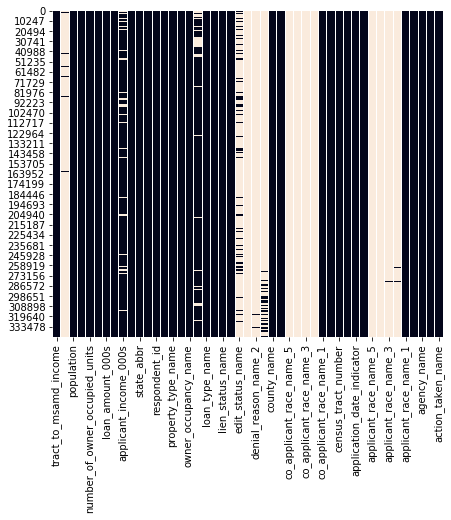

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(df.isnull(), cbar=False)

In [10]:
df.edit_status_name.isnull().value_counts()

True     271594
False     56295
Name: edit_status_name, dtype: int64

In [11]:
removal_cols = df[['rate_spread','edit_status_name','denial_reason_name_2','co_applicant_race_name_5','co_applicant_race_name_4',
                  'co_applicant_race_name_3','co_applicant_race_name_2','applicant_race_name_5','applicant_race_name_4',
                  'applicant_race_name_3','applicant_race_name_2', 'denial_reason_name_1','denial_reason_name_3']]

In [370]:
df2=df.drop(columns=removal_cols)

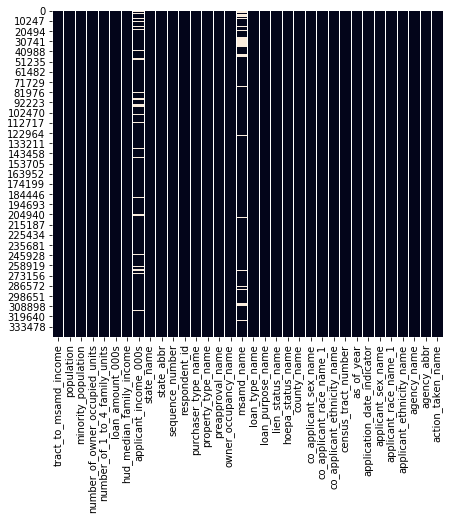

In [13]:
plt.figure(figsize=(7,6))
sns.heatmap(df2.isnull(), cbar=False)

Rather than dropping the remaining columns that are missing, we will impute the missing values to preserve the observation

In [14]:
df2.loc[pd.isnull(df2).any(1)==True] #50,0444 observations have some missing value
null_test = df2.copy()
null_test.loc[(pd.isnull(null_test).any(1)==True)] # do these observations have something systematically similar about them?

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,state_abbr,...,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
5,119.629997,4775.0,18.889999,954.0,1332.0,206,72300.0,NaN,Washington,WA,...,No co-applicant,734.06,2016,0,Male,White,Not Hispanic or Latino,Office of the Comptroller of the Currency,OCC,Loan originated
6,103.209999,4745.0,33.070000,1337.0,1442.0,356,90300.0,NaN,Washington,WA,...,No co-applicant,519.23,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
7,93.769997,7451.0,33.400002,1761.0,2478.0,265,72300.0,NaN,Washington,WA,...,Not Hispanic or Latino,731.08,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
8,109.580002,6567.0,21.709999,1130.0,1579.0,131,73600.0,NaN,Washington,WA,...,No co-applicant,109.10,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
26,87.199997,5808.0,28.150000,1765.0,2321.0,123,65800.0,NaN,Washington,WA,...,No co-applicant,119.00,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
31,59.689999,1686.0,33.930000,177.0,478.0,191,90300.0,NaN,Washington,WA,...,Hispanic or Latino,305.01,2016,0,Male,White,Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
32,109.730003,5035.0,18.830000,1249.0,1567.0,277,73300.0,NaN,Washington,WA,...,No co-applicant,408.03,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated
36,99.269997,6786.0,35.340000,1679.0,1978.0,99,65800.0,NaN,Washington,WA,...,Not Hispanic or Latino,206.05,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
38,94.080002,5941.0,25.750000,1019.0,1855.0,228,73300.0,NaN,Washington,WA,...,No co-applicant,413.20,2016,0,Male,White,Not Hispanic or Latino,Consumer Financial Protection Bureau,CFPB,Loan originated
47,112.559998,4333.0,16.570000,1207.0,1506.0,289,73300.0,NaN,Washington,WA,...,No co-applicant,404.12,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated


In [15]:
df2.loc[df2.msamd_name.isnull()].applicant_income_000s.isnull().value_counts(normalize=True) #msamd_name represents a metro division/area where the property is located in. 
# both msamd name and applicant income are missing 8% of the time. 

False    0.910565
True     0.089435
Name: applicant_income_000s, dtype: float64

In [16]:
df2.loc[(df2.applicant_income_000s.isnull())
       & (df2.msamd_name.isnull())] # appears as though half the time one is missing, so is the other... do these move together?

,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,state_name,state_abbr,...,co_applicant_ethnicity_name,census_tract_number,as_of_year,application_date_indicator,applicant_sex_name,applicant_race_name_1,applicant_ethnicity_name,agency_name,agency_abbr,action_taken_name
116,94.029999,3303.0,10.020000,1028.0,1409.0,186,55600.0,NaN,Washington,WA,...,No co-applicant,9712.00,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
420,99.480003,2901.0,18.170000,935.0,1510.0,391,55600.0,NaN,Washington,WA,...,"Information not provided by applicant in mail,...",9604.00,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
500,86.660004,9912.0,39.060001,2176.0,3416.0,118,55600.0,NaN,Washington,WA,...,No co-applicant,109.02,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
556,106.550003,2694.0,10.130000,706.0,1492.0,113,55600.0,NaN,Washington,WA,...,"Information not provided by applicant in mail,...",9701.00,2016,0,Male,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
575,135.029999,4359.0,7.480000,1513.0,1945.0,208,55600.0,NaN,Washington,WA,...,No co-applicant,9753.00,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
585,106.339996,2825.0,72.389999,810.0,1439.0,117,55600.0,NaN,Washington,WA,...,Not Hispanic or Latino,9401.00,2016,0,Male,American Indian or Alaska Native,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated
665,93.139999,8040.0,20.920000,1946.0,2741.0,67,55600.0,NaN,Washington,WA,...,No co-applicant,104.00,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
685,86.660004,9912.0,39.060001,2176.0,3416.0,128,55600.0,NaN,Washington,WA,...,No co-applicant,109.02,2016,0,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Department of Housing and Urban Development,HUD,Loan originated
886,65.330002,6848.0,76.309998,1116.0,1881.0,196,55600.0,NaN,Washington,WA,...,No co-applicant,106.00,2016,0,Not applicable,Not applicable,Not applicable,Consumer Financial Protection Bureau,CFPB,Loan originated
891,111.029999,4109.0,14.210000,898.0,1342.0,135,55600.0,NaN,Washington,WA,...,No co-applicant,9708.00,2016,0,Male,White,Not Hispanic or Latino,Department of Housing and Urban Development,HUD,Loan originated


In [17]:
df2['missing_income'] = np.where((~df2.msamd_name.isnull()) & (df2.applicant_income_000s.isnull()),1,0)
df2['missing_msamd'] = np.where((~df2.applicant_income_000s.isnull()) & (df2.msamd_name.isnull()),1,0)
df2['missing_both'] = np.where((df2.msamd_name.isnull()) & (df2.applicant_income_000s.isnull()),1,0)

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327889 entries, 0 to 364323
Data columns (total 37 columns):
tract_to_msamd_income             327656 non-null float64
population                        327659 non-null float64
minority_population               327659 non-null float64
number_of_owner_occupied_units    327654 non-null float64
number_of_1_to_4_family_units     327658 non-null float64
loan_amount_000s                  327889 non-null int64
hud_median_family_income          327661 non-null float64
applicant_income_000s             301382 non-null float64
state_name                        327889 non-null object
state_abbr                        327889 non-null object
sequence_number                   327889 non-null int64
respondent_id                     327889 non-null object
purchaser_type_name               327889 non-null object
property_type_name                327889 non-null object
preapproval_name                  327889 non-null object
owner_occupancy_name         

In [19]:
pairs = df2[['action_taken_name','loan_amount_000s','hud_median_family_income','number_of_1_to_4_family_units',
            'number_of_owner_occupied_units','minority_population','population','tract_to_msamd_income','missing_income',
            'missing_msamd','missing_both']]
#sns.pairplot(pairs, hue='missing_income')

While some loose interpretations can be drawn from this, reasons for missing income, missing msamd, or missing both don't appear to be strongly related to any single other variable.
Cool to note: 
- normal distributions in tract to msamd income, population, number of owner occupied units, and number of 1-4 family units
- hud median family income appears bucketed at interval levels of income, with noticeable observations occurring in high-income areas ($90,000/household)


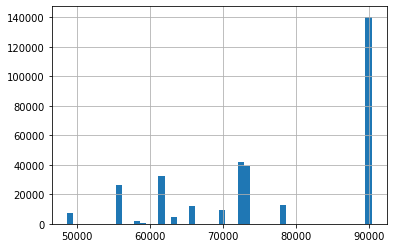

In [20]:
df2.hud_median_family_income.hist(bins=50)

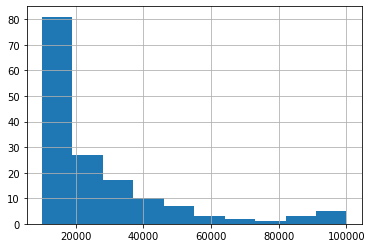

In [21]:
df2.loc[df2.loan_amount_000s > 10000].loan_amount_000s.hist() #were these 156 entries with loan amounts over 10,000,000 miscodings? Or real loan amounts? How to best handle them? 

In [22]:
df2.loc[df2.loan_amount_000s > 10000].applicant_income_000s.describe() # the incomes for these individuals seem very typical. This is used as justification to replace these 156 values with the median loan amount

count       9.000000
mean      455.000000
std       848.268236
min        24.000000
25%        59.000000
50%        85.000000
75%       228.000000
max      2629.000000
Name: applicant_income_000s, dtype: float64

In [23]:
median = df2.loc[df2.loan_amount_000s < 10000].loan_amount_000s.median()

In [371]:
df2['loan_amount_000s'] = np.where(df2.loan_amount_000s >= 10000, median, df2['loan_amount_000s']) #replacing outliers with the median loan amount for the dataest

In [372]:
df2.loan_amount_000s.describe()

count    327889.000000
mean        288.929833
std         263.172755
min           1.000000
25%         172.000000
50%         248.000000
75%         350.000000
max        9951.000000
Name: loan_amount_000s, dtype: float64

### Assigning a unique identifier to each oberservation

In [373]:
import uuid

In [402]:
unique_identifier = []
for i in range(len(df2)):
    unique_identifier.append(uuid.uuid4())

df2['unique_identifier'] = unique_identifier

## Preprocessing

In [405]:
numeric = df2[['unique_identifier','tract_to_msamd_income','population','minority_population','number_of_owner_occupied_units'
              , 'number_of_1_to_4_family_units','loan_amount_000s','hud_median_family_income'
              , 'applicant_income_000s']]
categorical = df2[['unique_identifier','purchaser_type_name','property_type_name','preapproval_name','owner_occupancy_name',
                   'loan_type_name','loan_purpose_name','lien_status_name','hoepa_status_name','co_applicant_sex_name'
                  , 'co_applicant_race_name_1','co_applicant_ethnicity_name','application_date_indicator','applicant_sex_name'
                  ,'applicant_race_name_1','applicant_ethnicity_name','agency_name','msamd_name','action_taken_name']]

In [26]:
df2.info() #dropping respondent_id, sequence_number, as_of_year (all 2016), census_tract_number (redundant), missing_income, missing_msamd, missing_both
# state_name, state_abbr, repondent_id, 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327889 entries, 0 to 364323
Data columns (total 37 columns):
tract_to_msamd_income             327656 non-null float64
population                        327659 non-null float64
minority_population               327659 non-null float64
number_of_owner_occupied_units    327654 non-null float64
number_of_1_to_4_family_units     327658 non-null float64
loan_amount_000s                  327889 non-null float64
hud_median_family_income          327661 non-null float64
applicant_income_000s             301382 non-null float64
state_name                        327889 non-null object
state_abbr                        327889 non-null object
sequence_number                   327889 non-null int64
respondent_id                     327889 non-null object
purchaser_type_name               327889 non-null object
property_type_name                327889 non-null object
preapproval_name                  327889 non-null object
owner_occupancy_name       

In [365]:
categorical.msamd_name.value_counts(normalize=True)# nearly half the data is in one msamd_name, this justifies filling nulls with the name

Seattle, Bellevue, Everett - WA            0.465670
Tacoma, Lakewood - WA                      0.138233
Portland, Vancouver, Hillsboro - OR, WA    0.089976
Spokane, Spokane Valley - WA               0.073223
Bremerton, Silverdale - WA                 0.041669
Olympia, Tumwater - WA                     0.040671
Kennewick, Richland - WA                   0.038964
Bellingham - WA                            0.029999
Yakima - WA                                0.023530
Mount Vernon, Anacortes - WA               0.018149
Longview - WA                              0.015258
Wenatchee - WA                             0.015168
Walla Walla - WA                           0.006959
Lewiston - ID, WA                          0.002530
Name: msamd_name, dtype: float64

In [406]:
categorical= categorical.fillna(categorical.mode().iloc[:,-1])

In [407]:
categorical['loan_decision'] = np.where(categorical.action_taken_name == 'Loan originated', 0 , 1)

In [408]:
categorical.loan_decision.value_counts(normalize=True)

0    0.804272
1    0.195728
Name: loan_decision, dtype: float64

20% of mortgages in the sample data set were denied a loan

In [418]:
categorical.drop(['application_date_indicator'], axis=1, inplace=True)

In [429]:
categorical.drop(['action_taken_name'], axis=1, inplace=True)

In [431]:
categorical.iloc[:,1:17].columns

Index(['purchaser_type_name', 'property_type_name', 'preapproval_name',
       'owner_occupancy_name', 'loan_type_name', 'loan_purpose_name',
       'lien_status_name', 'hoepa_status_name', 'co_applicant_sex_name',
       'co_applicant_race_name_1', 'co_applicant_ethnicity_name',
       'applicant_sex_name', 'applicant_race_name_1',
       'applicant_ethnicity_name', 'agency_name', 'msamd_name'],
      dtype='object')

In [432]:
cols = list(categorical.iloc[:,1:17].columns)

In [433]:
cat_encode = pd.get_dummies(categorical, columns=cols)

In [436]:
prep_df = pd.merge(cat_encode, numeric, how='inner', on='unique_identifier')

## Random Forest Imputation of Missing Continuous Variables

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [161]:
# Splitting to obs w/ income and those without income
null_data = prep_df[prep_df.isnull().any(axis=1)]
full_data = prep_df[prep_df.isnull().any(axis=1) == False]

In [162]:
fitter = RandomForestRegressor()

In [234]:
mask = full_data.drop(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'loan_amount_000s', 'hud_median_family_income',
       'applicant_income_000s', 'sequence_number'], axis=1).columns

In [455]:
# need an array of col indices for categorical column
prep_df.columns.get_loc('msamd_name_Yakima - WA') #86 87 88 89 91 92 col
indices = list(np.arange(0,85))

In [196]:
fitter.fit(full_data[mask], full_data[cols])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [197]:
imputed_vals= fitter.predict(X = null_data[mask])


In [200]:
cols

Index(['tract_to_msamd_income', 'population', 'minority_population',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'hud_median_family_income', 'applicant_income_000s'],
      dtype='object')

In [210]:
full_data.tract_to_msamd_income.mean() # checking that values are correct columns

107.30871869456288

In [213]:
imputed = pd.DataFrame(imputed_vals)

In [216]:
imputed.rename({0: 'tract_to_msamd_income', 1: 'population', 2:'minority_population'
                                            , 3: 'number_of_owner_occupied_units', 4: 'number_of_1_to_4_family_units'
                                            , 5: 'hud_median_family_income', 6: 'applicant_income_000s'}, axis=1, inplace=True)

In [220]:
null_data[cols]= imputed

C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


## Imputing miss values using MissForest

In [443]:
from missingpy import MissForest

In [440]:
prep_df.loc[prep_df['population'].isnull() ==True]#.loan_decision.value_counts(normalize=True)

,unique_identifier,loan_decision,purchaser_type_name_Affiliate institution,"purchaser_type_name_Commercial bank, savings bank or savings association",purchaser_type_name_Fannie Mae (FNMA),purchaser_type_name_Farmer Mac (FAMC),purchaser_type_name_Freddie Mac (FHLMC),purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,...,msamd_name_Wenatchee - WA,msamd_name_Yakima - WA,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s
1245,5a9c4b6e-92b4-446a-8649-6a3499432696,0,0,0,0,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,450.0,NaN,212.0
1746,c308a4b4-b6e1-4c2b-a515-1cb9c95b83b6,0,0,0,0,0,0,0,0,1,...,0,0,NaN,NaN,NaN,NaN,NaN,660.0,NaN,669.0
2651,336b20cd-f288-4b3a-b66f-dffb2efc12ae,0,0,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,182.0,NaN,291.0
4016,3cb30be3-f300-409e-a1d5-0df52f1dcf61,0,0,0,0,0,0,0,1,0,...,0,0,NaN,NaN,NaN,NaN,NaN,94.0,NaN,70.0
4946,8b660fb8-a2ac-418b-a2cf-954c56dd3d15,0,0,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,263.0,NaN,123.0
5116,52f54593-3693-45ba-84a4-326dac976404,0,0,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,1738.0,NaN,NaN
5121,ee521ed1-bf4c-4a10-840b-3ac62b34630d,0,0,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,3370.0,NaN,NaN
5126,9709e823-a1d7-44c3-a918-b42b67cd01a3,0,0,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN
5216,a4a98f61-95cb-43d4-9358-5b9835febd2d,0,1,0,0,0,0,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,1688.0,NaN,862.0
7016,c5264ed3-97bd-4f15-8167-a2858e323ea7,0,0,0,0,0,1,0,0,0,...,0,0,NaN,NaN,NaN,NaN,NaN,312.0,NaN,86.0


In [441]:
230/len(prep_df)

0.0007014568954737732

Of the observations missing substantial amounts of data (n=230), 76% of them are for loans that were denied. This suggests that the missing data could be an inhibitor to getting a loan approved. Since these observations make up 0.07% of the total data, we are dropping the observations from the dataset. 

In [442]:
prep_df = prep_df.loc[~prep_df['population'].isnull()]

* note: population missing was arbitrarily chosen as the variable for deciding whether to keep the observations or not. When the population is missing, the other continuous variables appear to be systematically missing, therefore, "population" served as the filtering column.

In [480]:
column_names = prep_df.iloc[:,1:].columns

In [466]:
X= np.array(prep_df.iloc[:,1:])

In [467]:
imputer = MissForest()
x_imputed = imputer.fit_transform(X, cat_vars=np.array(indices))

C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\missingpy\missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 0


C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\missingpy\missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 1


C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\missingpy\missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 2


C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\missingpy\missforest.py:407: RuntimeWarning: invalid value encountered in long_scalars
  (Ximp[:, self.cat_vars_] != Ximp_old[:, self.cat_vars_])) / n_catmissing


Iteration: 3


In [481]:
df_imputed = pd.DataFrame(x_imputed, columns = column_names)

In [483]:
df_imputed['unique_identifier'] = prep_df['unique_identifier']

In [485]:
df_imputed.to_csv("imputed_loans.csv")

In [486]:
df_imputed

,loan_decision,purchaser_type_name_Affiliate institution,"purchaser_type_name_Commercial bank, savings bank or savings association",purchaser_type_name_Fannie Mae (FNMA),purchaser_type_name_Farmer Mac (FAMC),purchaser_type_name_Freddie Mac (FHLMC),purchaser_type_name_Ginnie Mae (GNMA),"purchaser_type_name_Life insurance company, credit union, mortgage bank, or finance company",purchaser_type_name_Loan was not originated or was not sold in calendar year covered by register,purchaser_type_name_Other type of purchaser,...,msamd_name_Yakima - WA,tract_to_msamd_income,population,minority_population,number_of_owner_occupied_units,number_of_1_to_4_family_units,loan_amount_000s,hud_median_family_income,applicant_income_000s,unique_identifier
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,121.690002,8381.0,23.790001,2175.0,2660.0,227.0,73300.0,116.00,5a047f74-ca24-46c3-9fe0-bfaedf9f88d0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,83.370003,4915.0,23.990000,1268.0,1777.0,240.0,57900.0,42.00,bf3d45f5-8404-42ce-8d3e-7b6169993d66
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,91.129997,5075.0,11.820000,1136.0,1838.0,241.0,73300.0,117.00,c28bb0a5-f3b1-40ea-90a4-ac2358ba2b2a
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,146.169998,5032.0,8.590000,1525.0,1820.0,351.0,73300.0,315.00,9f6ac6df-3a9e-460a-9872-149cf1eeeb35
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,162.470001,5183.0,10.500000,1705.0,2104.0,417.0,78100.0,114.00,4ec22f15-c865-4656-baeb-c44b210fac81
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,119.629997,4775.0,18.889999,954.0,1332.0,206.0,72300.0,64.45,be5c0981-7e24-4f7b-ab1b-12f832085f56
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,103.209999,4745.0,33.070000,1337.0,1442.0,356.0,90300.0,90.22,13b27d59-c041-4c42-9315-3b8f7363c602
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,93.769997,7451.0,33.400002,1761.0,2478.0,265.0,72300.0,91.61,4d19d991-924e-4fa1-ab33-dacaa5489c48
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,109.580002,6567.0,21.709999,1130.0,1579.0,131.0,73600.0,60.41,d90b1ac3-f893-4693-a7f2-5b5cae12ed6d
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,87.160004,9326.0,19.400000,2449.0,3403.0,199.0,61400.0,37.00,8415d65f-7396-484c-9663-70a4adb923e7


### Normalizing continuous variables

In [7]:
df_imputed = pd.read_csv('imputed_loans.csv')

In [12]:
cont_vars = df_imputed.iloc[:,85:93]

In [13]:
col_names = cont_vars.columns

In [14]:
scaled = StandardScaler()
cont_vars_sc = scaled.fit_transform(cont_vars)


In [15]:
continuous_z = pd.DataFrame(cont_vars_sc, columns = col_names)

In [16]:
scaled_df = df_imputed.iloc[:,:85].merge(continuous_z, how='inner', left_index=True, right_index=True)

In [17]:
scaled_df['loan_denied'] = scaled_df['loan_decision'].copy()

In [18]:
scaled_df.drop(columns=['loan_decision'], axis=1, inplace=True)

C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


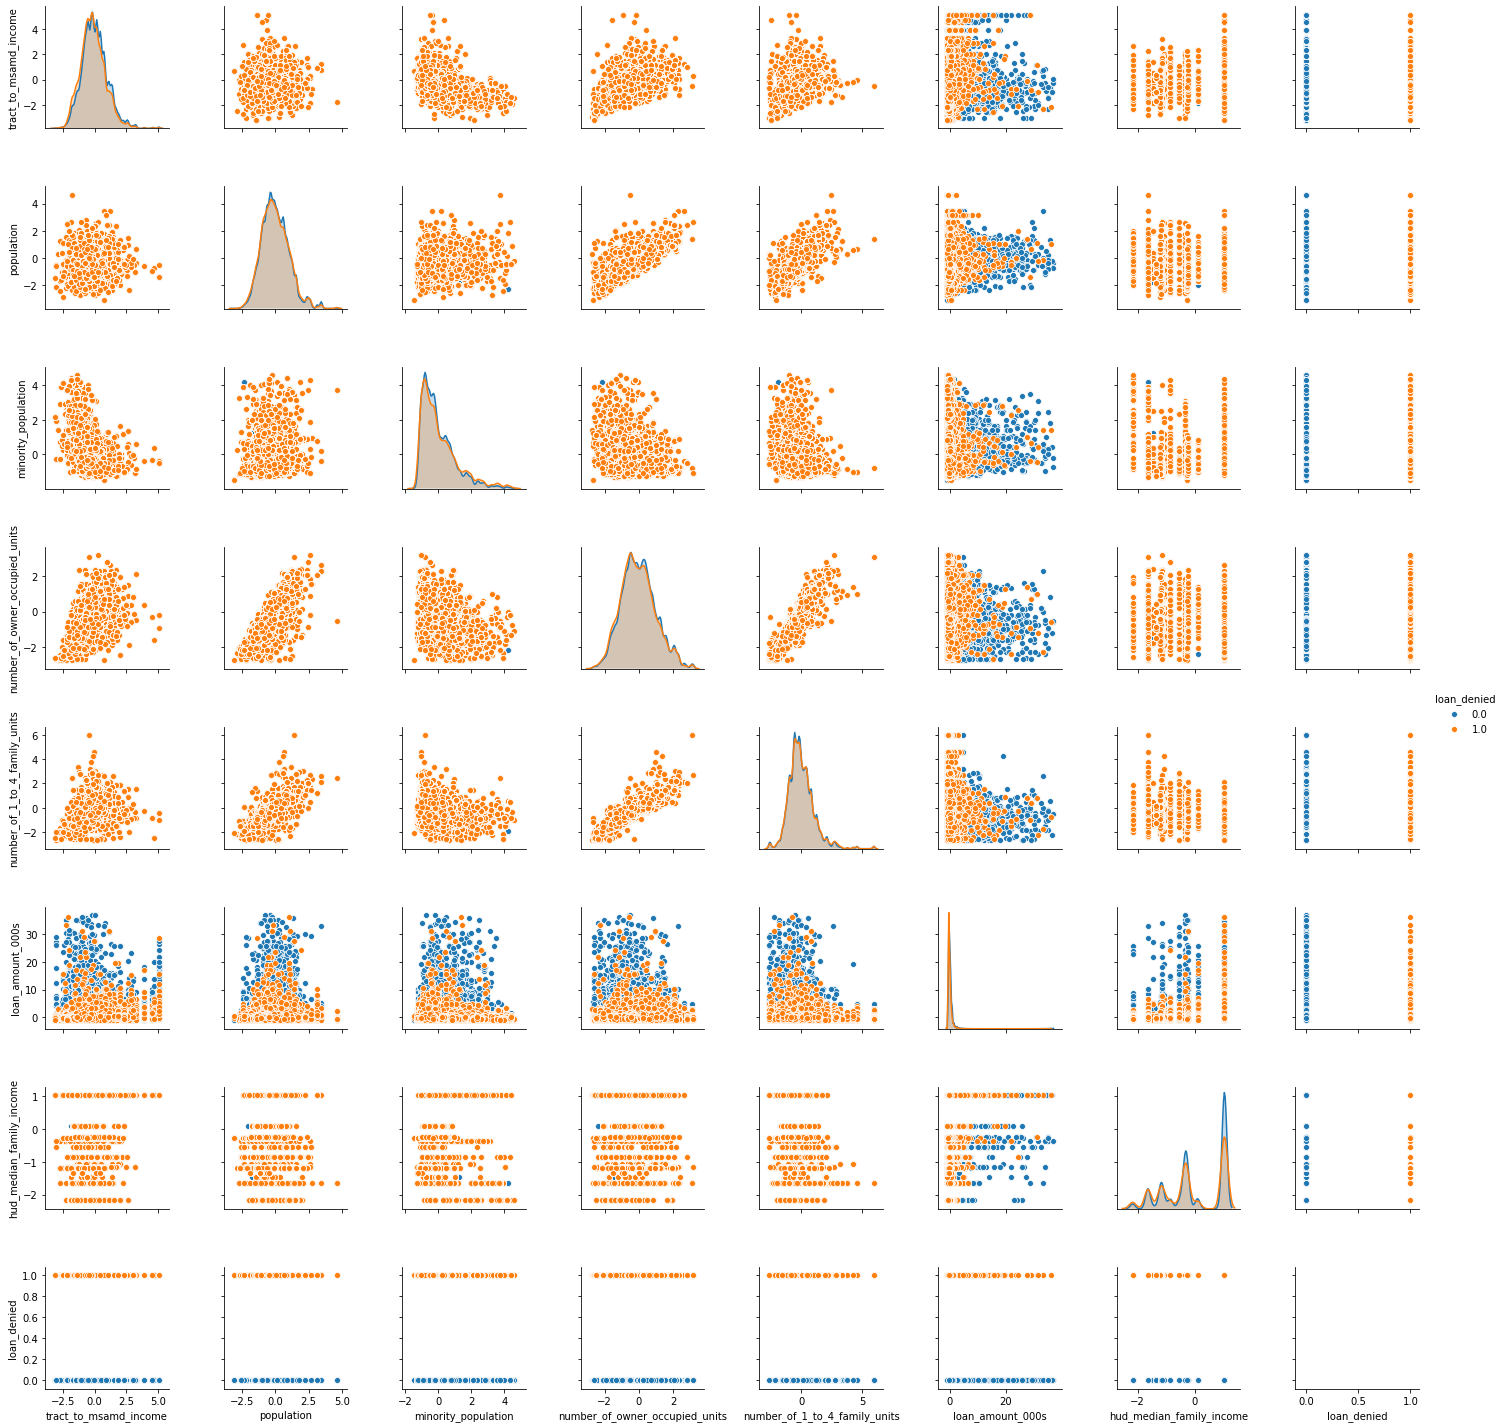

In [19]:
sns.pairplot(scaled_df.iloc[:,85:], hue='loan_denied')

In [119]:
x = scaled_df.iloc[:,:-1]
y = scaled_df.iloc[:,-1]

In [120]:
x.drop(columns=['Unnamed: 0'], inplace=True)

### Balancing the dependent variable using SMOTE

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [22]:
from imblearn.over_sampling import SMOTE # synthetic minority oversampling technique = artificially balancing out observations of the minority group by drawing feature vectors are creating new but similar observations
os= SMOTE(random_state=42)
from sklearn import metrics

In [55]:
df_imputed.loan_decision.value_counts(normalize=True)

0.0    0.804654
1.0    0.195346
Name: loan_decision, dtype: float64

- 20% loan denied

In [121]:
x_train,x_test, y_train, y_test = train_test_split(np.array(x),np.array(y), test_size = 0.25, random_state = 42 )

In [122]:
columns=x.columns
os_data_x,os_data_y=os.fit_sample(x_train, y_train)
os_data_x = pd.DataFrame(data=os_data_x,columns=columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['loan_denied'])

In [58]:
print("Number of approved loans in oversampled data",len(os_data_y[os_data_y['loan_denied']==0]))
print("Number of loan denied's in oversampled data",len(os_data_y[os_data_y['loan_denied']==1]))

Number of approved loans in oversampled data 197685
Number of loan denied's in oversampled data 197685


## Logistic Regression

In [59]:
logreg = LogisticRegression()

In [123]:
x = os_data_x
y = os_data_y

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [62]:
logreg.fit(x_train, y_train)

C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
y_pred=logreg.predict(x_test)

In [64]:
logreg.score(x_test,y_test)

0.9059720971641897

In [65]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[41618  7951]
 [ 1343 47931]]


In [66]:
print(41674+7895+1339+47935), print(7895), print(1339/98843)

98843
7895
0.013546735732424148


(None, None, None)

- False negatives: 8% of observations are denied when they were, in fact, approved
- False positives: 1.3% of observations are approved when they were, in fact, denied

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90     49569
         1.0       0.86      0.97      0.91     49274

    accuracy                           0.91     98843
   macro avg       0.91      0.91      0.91     98843
weighted avg       0.91      0.91      0.91     98843



In [68]:
from sklearn.metrics import roc_auc_score, roc_curve

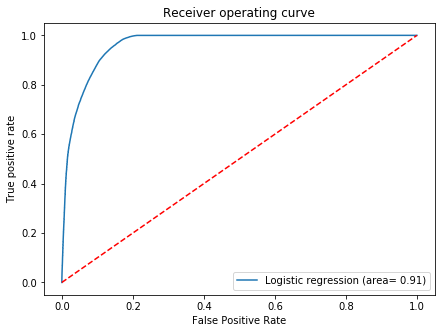

In [69]:
logreg_roc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure(figsize=(7,5))

plt.plot(fpr,tpr, label='Logistic regression (area= %0.2f)' % logreg_roc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel("True positive rate")
plt.title("Receiver operating curve")
plt.legend(loc='best');

## Coeffificient Estimates & interpretation

In [70]:
import statsmodels.api as sm

In [71]:
cols = x.columns

In [72]:
coeffs = pd.DataFrame(logreg.coef_, columns = cols)

In [73]:
coeffs_df = pd.pivot_table(coeffs, columns=0).reset_index()

In [74]:
coeffs_df.rename(columns = {'index': 'Feature',0: 'coeff_est'}, inplace =True)

In [146]:
coeffs_df

,Feature,coeff_est
0,agency_name_Consumer Financial Protection Bureau,-0.664847
1,agency_name_Department of Housing and Urban De...,1.189850
2,agency_name_Federal Deposit Insurance Corporation,-0.800912
3,agency_name_Federal Reserve System,0.876678
4,agency_name_National Credit Union Administration,-1.496130
5,agency_name_Office of the Comptroller of the C...,-1.084897
6,applicant_ethnicity_name_Hispanic or Latino,-0.200675
7,applicant_ethnicity_name_Information not provi...,-0.420714
8,applicant_ethnicity_name_Not Hispanic or Latino,-0.298949
9,applicant_ethnicity_name_Not applicable,-1.059920


- If found to be significant, these factors increase the chance that a loan will get denied
- need to be transformed from log-odds to something more interpretable

### Dimension Reduction techniques to reduce overfitting: Ridge regression

In [130]:
import math
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 42)

In [131]:
lr = LinearRegression()


In [132]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
rr = Ridge(alpha=0.01)

In [134]:
rr.fit(x_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [135]:
train_score = lr.score(x_train, y_train)

In [136]:
train_score

0.7051359936007789

In [137]:
test_score = lr.score(x_test, y_test)

In [138]:
test_score

0.703073926845703

In [139]:
rr100 = Ridge(alpha=100)

In [140]:
rr100.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [141]:
train_score_100 = rr.score(x_train, y_train)

In [142]:
train_score_100

0.7051952570165975

In [143]:
rr100.score(x_test, y_test)

0.7031436927980411

- Poor performing model
- Lacking in interpretability options for coefficients

### Random Forest Classifier Technique (in search of feature importance)

In [148]:
from sklearn.ensemble import RandomForestClassifier

In [149]:
clf = RandomForestClassifier(n_jobs = 2, random_state=42)

In [150]:
clf.fit(x_train, y_train)

C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\pdilm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [153]:
# applying fitted classifier to test data
preds = clf.predict(x_test)

In [152]:
#predicted probabilities for first 10 observations
clf.predict_proba(x_test)[0:10]

array([[0. , 1. ],
       [1. , 0. ],
       [0.1, 0.9],
       [1. , 0. ],
       [0. , 1. ],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.5, 0.5],
       [1. , 0. ],
       [1. , 0. ]])

In [155]:
preds[0:5]

array([1., 0., 1., 0., 1.])

In [156]:
np.array(y_test)[0:5]

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]])

In [159]:
print(confusion_matrix(y_test, preds))

[[45599  3970]
 [ 2375 46899]]


Overall error rate:
-  6345/98843 = 6.4%
- Type 1 error rate 3970/49569 = 8% = denied for a loan when they shouldn't have been
- Type 2 error rate 2375/49274 = 4.8% = got loan when they should've been denied

Interpretation: This tradeoff in errors seems to be favorable for a mortgage company. It seems reasonable that they'd care more about preventing unqualified borrowers from getting a loan than missing out on a few qualified borrowers (within reason)

#### Feature Importance

In [162]:
features = pd.DataFrame((zip(x_train, clf.feature_importances_)))

In [169]:
features.rename(columns={0: 'Feature', 1:'Importance'}, inplace=True)

Top 10 most important features in determining if a home loan application gets denied or not

In [178]:
top_10=features.sort_values(by='Importance', ascending = False)[0:10]

In [182]:
top_10 = top_10.set_index('')
top_10.plot.barh(y='Feature')

TypeError: Empty 'DataFrame': no numeric data to plot